#### Copyright 2017 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to pandas

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`
  * Reindex a `DataFrame` to shuffle data

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

## Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [ ]:
from __future__ import print_function

import pandas as pd
pd.__version__

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

One way to create a `Series` is to construct a `Series` object. For example:

In [ ]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [ ]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [ ]:
california_housing_dataframe.head()

Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

In [ ]:
california_housing_dataframe.hist('housing_median_age')

#Historgram ကို pandas မှာဆွဲတဲ့အခါ#
df['Years'].hist(bins=np.arange(0,41,1)) #bin ကို width တခုနဲ့ range နဲ့ပေးတာပါ။ np.arange ဖြစ်တာ သတိထားပါ။

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [ ]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

In [ ]:
print(type(cities['City name'][1]))
cities['City name'][1]

In [ ]:
print(type(cities[0:2]))
cities[0:2]

In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [ ]:
population / 1000.

[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:

In [ ]:
import numpy as np

np.log(population)

For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map), 
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [ ]:
population.apply(lambda val: val > 1000000)


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [ ]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

## Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [ ]:
# Your code here

### Solution

Click below for a solution.

In [ ]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row. 

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [ ]:
city_names.index

In [ ]:
cities.index

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [ ]:
cities.reindex([2, 0, 1])

Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [ ]:
cities.reindex(np.random.permutation(cities.index))

For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Exercise #2

The `reindex` method allows index values that are not in the original `DataFrame`'s index values. Try it and see what happens if you use such values! Why do you think this is allowed?

In [ ]:
# Your code here

### Solution

Click below for the solution.

If your `reindex` input array includes values not in the original `DataFrame` index values, `reindex` will add new rows for these "missing" indices and populate all corresponding columns with `NaN` values:

In [ ]:
cities.reindex([0, 4, 5, 2])

This behavior is desirable because indexes are often strings pulled from the actual data (see the [*pandas* reindex
documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) for an example
in which the index values are browser names).

In this case, allowing "missing" indices makes it easy to reindex using an external list, as you don't have to worry about
sanitizing the input.

# အချိန်ထည့်သိမ်းလိုပါက

In [ ]:
import time
import pandas as pd
list1=list(range(10))
df=pd.DataFrame(data=list1)
t = time.time()
df.to_csv("csv_time{}.csv".format(t)) #Content ထဲမှာသိမ်းလ့ိမ်မယ်

In [ ]:
import pandas as pd
import numpy as np
list1=np.array([['Apple','Red'],['Banana','Yellow'],['Citrus','Orange']])
print(list1.shape)
df_1=pd.DataFrame(list1,columns=['Fruits','Color'])
df_1

(3, 2)


,Fruits,Color
0,Apple,Red
1,Banana,Yellow
2,Citrus,Orange


In [ ]:
df_2=pd.DataFrame([[100,'Sunday']],columns=['Price','Expiry Date'])
df_2

,Price,Expiry Date
0,100,Sunday


In [ ]:
df_3=df_1+df_2  #Pandaကေိုဆက်လက်လေ့လာရန်
df_3

,Color,Expiry Date,Fruits,Price
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [ ]:
for each in df_1.iterrows():
    print(each)

(0, Fruits    Apple
Color       Red
Name: 0, dtype: object)
(1, Fruits    Banana
Color     Yellow
Name: 1, dtype: object)
(2, Fruits    Citrus
Color     Orange
Name: 2, dtype: object)


Removing duplicate

In [ ]:
import pandas as pd
df_test=pd.DataFrame(data=[["a",1],["a",2],["b",3]],columns=["Alpha","Number"])
df_test.drop_duplicates(subset='Alpha',keep='first',inplace=False)   #Subset is which columns, keep has 3 values: 'first','last','False' —'first' က ပထမ တန်ဖိုးကိုချန်ပြီး ကျန်တာဖယ်။ 'last' က နောက်ဆုံးချန်မယ်။ 'False' က ချန်တာမရှိ။ inplace မှာ True နဲ့ False ရှိတယ်။ True ဖြစ်တာပဲ ဖယ်မယ်။
df_test

,Alpha,Number
0,a,1
1,a,2
2,b,3


**csv အနေဖြင့်သိမ်းခြင်း**

In [ ]:
df_test.to_csv('pdCSV.csv')
#to_csv လိုမျိုး to_excel တွေ to_json တွေအများကြီးရှိ

In [ ]:
import pandas as pd
california_housing_dataframe = pd.read_csv("sample_data/california_housing_train.csv", sep=",")
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
california_housing_dataframe.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [ ]:
california_housing_dataframe['population'].value_counts().sort_index() #california_housing_dataframe.population လည်းရေးလို့ရတယ်

3.0        1
6.0        1
8.0        2
9.0        2
11.0       1
          ..
15037.0    1
15507.0    1
16122.0    1
28566.0    1
35682.0    1
Name: population, Length: 3683, dtype: int64

.value_counts(normalize=True) ဆို normalize လုပ်ပြီးသားကိုပြမယ်။

Normalize ဆိုတာ proportion တမျိုး၊ probability တမျိုးပါပဲ။

The meaning between .value_counts() and .mean() has quite thin.
Parenthesis to be used as below not to confuse with list.

 (late_shipments['late']=='Yes').mean()  #True,False ပေါ်တဲ့နည်းက ဒါပဲရှိ [သေချာစဉ်းစားကြည့်]

In [ ]:
population = pd.Series([852469, 1015785, 485199])
population[population > 1000000]

In [ ]:
value_counts

Index တွေကို reset လုပ်တာပါ
df.reset_index()

In [ ]:
reset_index

In [ ]:
column

#Filtering#

df['country'].isin(df['WorldCupCountries']) ဆိုရင် worldcupCoutries မှာ ပါတဲ့နိုင်ငံတွေရဲ့ row သည် country ရဲ့ row တွေမှာ TRUE, FALSE ပြပါလိမ့်မည်။

.isin() ထဲမှာက pandas series ရသလို ရိုးရိုး list လည်းရ

#Sample အကြောင်း#
Sampling ယူတဲ့အခါ single random sampling ရှိသလို systematic random sample ရှိတယ်။

##Single Random Sampling ဆိုတာက## 

coffee_ratings.sample(n=5, random_state=19000113) #random_state က seed လိုပဲ။

##Systematic Sampling ဆိုတာက##

ငါးခုမြောက်တိုင်း ယူတာလိုမျိုးပေါ့
e.g

*Calculate the interval*

interval = pop_size // sample_size

*Systematically sample 70 rows*

attrition_sys_samp = attrition_pop.iloc[::interval]

Systematic Sampling တွေမှာ ရှိတတ်တဲ့ ပြဿနာတခုက sorting စီထားလို့ random မှန်မှန်မရတာပါ။ ဒီအတွက် shuffle ပြန်လုပ်ဖို့လိုပါတယ်။

df_sampled=df.sample(frac=1) #၁၀၀ % လုံးယူတာ
df_sampled=df.sample(frac=0.1) # ၁၀ % ပဲယူတာ

df_sampled=df.sample(frac=0.1,random_state=123) # ၁၀ % ပဲယူတာ။ random state ရဲ့ seed ကိုသတ်မှတ်ထားတာ

##Note##
.groupby('country').sample(fraction=0.1,random_state=123)
**calling .sample after .groupby take simple random sample within the country.**

It is different from

`attrition_pop.sample(n=400, weights="YearsAtCompany")`

Above is weighted by "YearsAtCompany" and taking sample 400.

population ရဲ့ ရာနှုန်းအလိုက် % အစား equal amount တခုကိုခွဲစေချင်လျှင်
argument n နဲ့ လုပ်လို့ရပါတယ်။

population.groupby('country').sample(n=15,random_state=123)

#Stratified and Weighted Random Sampling#

A close relative of stratified sampling that provides even more flexibility is weighted random sampling.

ဒီ weighted မှာ နောက် column တစ်ခုထပ်ထည့်ပြီး အဲဒီ column မှာ ဖြည့်ဖို့ data ကို np.where နဲ့ conditionally update ဖြစ်အောင် ပြင်လိုက်ပါတယ်။

condition=df['country']=='Taiwan'
df['new column']=np.where(condition, 2,1)

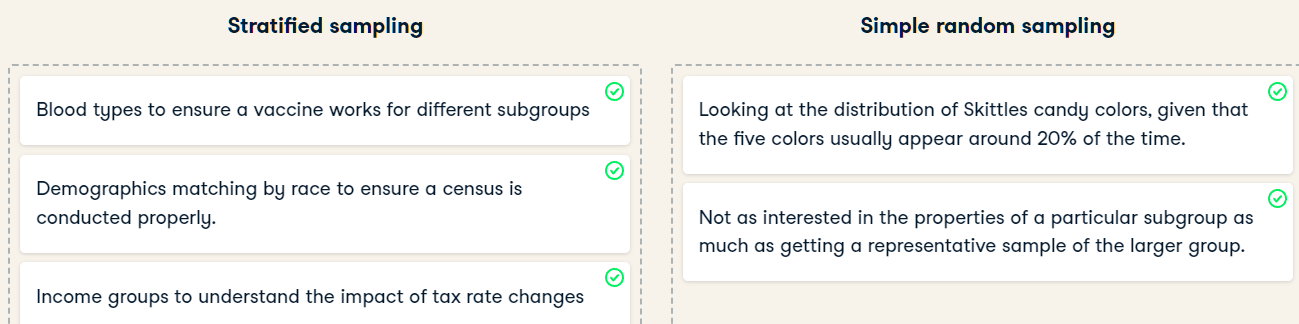

Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

#နောက် sampling တစ်ခုက Cluster Sampling ပါ

random.sample(*list*,k=3)  #list ထဲက သုံးခု ယူတာပဲရှိသေးတယ်။ standard module ထဲက random function ဖြစ်ပါတယ်။

# Remove categories with no rows
df['JobRole'] = df['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = df.groupby('JobRole').sample(n=10,random_state=2022)

sampling မှာ fraction နဲ့ number ယူတာကွာ
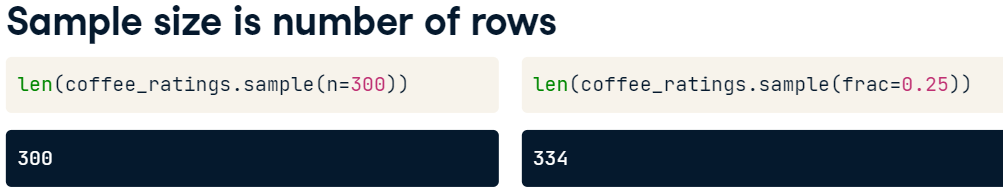

##Replace##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#ဒီလိုမျိုး replace ရပါတယ်
import pandas as pd
import numpy as np
nsfg=pd.read_hdf('/content/drive/MyDrive/Dataset Collection/NFSG/nsfg.hdf5')
pounds=nsfg['birthwgt_lb1']
pounds = pounds.replace([98, 99], np.nan)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pounds

0       5.0
1       4.0
2       5.0
3       NaN
4       8.0
       ... 
9353    4.0
9354    8.0
9355    7.0
9356    8.0
9357    8.0
Name: birthwgt_lb1, Length: 9358, dtype: float64

NaN value row တွေဖြုတ်ပစ်ဖို့ .dropna()
တချို့ column တွေကိုပဲ dropna လုပ်ချင်ရင် .dropna(subset=['col1','col2'])

In [ ]:
pounds.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


0       5.0
1       4.0
2       5.0
4       8.0
6       5.0
       ... 
9353    4.0
9354    8.0
9355    7.0
9356    8.0
9357    8.0
Name: birthwgt_lb1, Length: 6390, dtype: float64

Numpy လိုပဲ pandas မှာ .mean() .sum() .median() တွေလည်းရပါတယ်။

Numpy မှာက np.mean(df) ဆိုပြီးထည့်ရပါတယ်။

In [ ]:
pounds.median()
pounds.mean()
pounds.sum()

7.0

boolean column တစ်ခုကို ဖန်းတီးမယ်
pounds<5 အဲလိုမျိုးလုပ်မယ်
ပြီးတော့မှ false value တွေပဲသုံးချင်တယ်ဆိုရင် tilde (~) သုံးနိုင်ပါတယ်။
 

In [ ]:
pattern=pounds<5
pounds[~pattern] ဒီမှာဆို ငါးထက်ကြီးတာတွေပဲ တွက်ပြပါတော့တယ်။ Nan တွေကို dropna နဲ့ပြန်ဖျောက်ရပါမယ်။

0       5.0
2       5.0
3       NaN
4       8.0
5       NaN
       ... 
9352    7.0
9354    8.0
9355    7.0
9356    8.0
9357    8.0
Name: birthwgt_lb1, Length: 9008, dtype: float64

#Logical Operators#
birth_weight[A & B]    # both true 

birth_weight[A | B]

#Statiscal Tools#



#အတော်ခက်တယ် CDF, PMF, PDF နားလည်အောင် ကြိုးစားပါ#

PMF နဲ့ CDF ကွာခြားပုံ

PMF က သတ်မှတ် value တစ်ခုအတွက် ဖြစ်ပြီး
CDF က commulative ဖြစ်တဲ့အတွက် <, > အနေနဲ့ တွက်ရတာပါ။ Normal Distribution နဲ့ ခပ်ဆင်ဆင်တူပါတယ်။


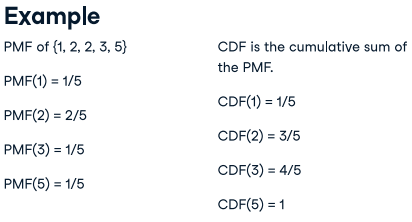

PMF (Probability Mass Function) is the probability that you
get exactly x

pmf အတွက် library 
from empiricaldist import Pmf

In [ ]:
#ဒီ class ရဲ့ pmf function ဖြစ်တဲ့ normalize လုပ်မယ်
pmf(age,normalize=True)

CDF (Cumulative Distribution Function) is the probability that
you get a value <= x

cdf အတွက်လည်း library အတူတူပါပဲ။

cdf မှာ Cdf() နဲ့ လုပ်တာက cdf object ဖန်တီးတာဖြစ်ပြီး
.cdf() ကို dataframe တစ်ခုရဲ့ cdf ကိုရှာတာပါ။ eg ကနေကြည့်ပါ

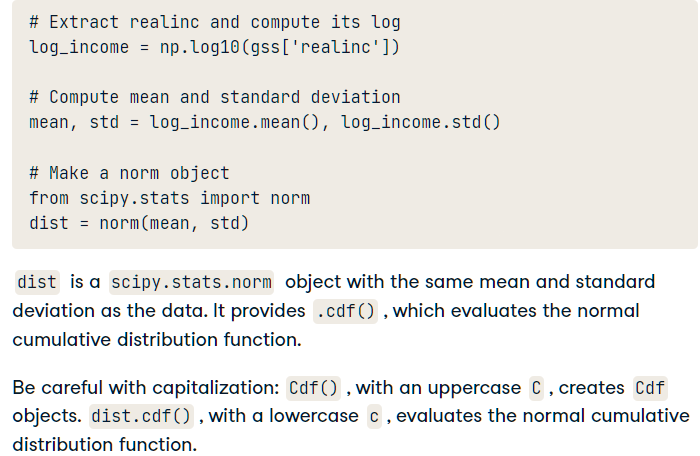


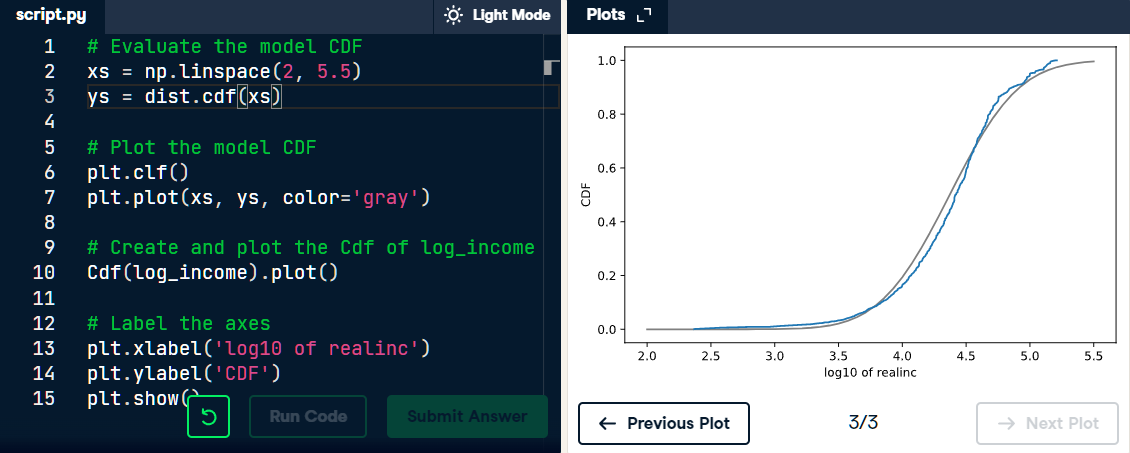

In [ ]:
!pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11973 sha256=6357871199c001cfa1ad7436a830df73c06e82069582a098c57fc4c20e7a6ba2
  Stored in directory: /root/.cache/pip/wheels/dd/dc/1c/c472efa84814edbb5b67d132ad3950534d0d7fd808543a659c
Successfully built empiricaldist


27.0


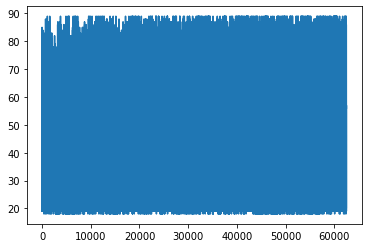

0        26.0
1        38.0
2        57.0
3        61.0
4        59.0
         ... 
62461    32.0
62462    61.0
62463    67.0
62464    57.0
62465    56.0
Name: , Length: 62466, dtype: float64


In [ ]:
from empiricaldist import Cdf
import matplotlib.pyplot as plt
gss=pd.read_hdf('/content/drive/MyDrive/Dataset Collection/GSS/gss.hdf5')
age = gss['age']
cdf_age = Cdf(age)
print(cdf_age(30))

cdf_age.plot()
plt.show()
print(cdf_age)

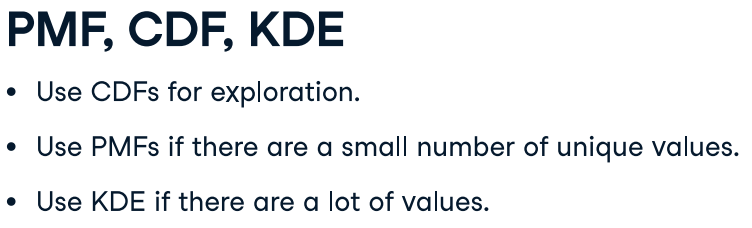

#Plotting#
pandas မှာလည်း builtin plot တချို့ရှိပါတယ်။
ရိုးရိုး plot df.plot လည်းရှိပါတယ်။
df.bar(label='test') လိုမျိုးပါ

df.plot(x='X',y='y',kind='scatter')

In [ ]:
import pandas as pd
df_feather=pd.read_feather('/content/drive/MyDrive/Dataset Collection/FeatherFiles/late_shipments.feather')
print(df_feather.columns)

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')


In [ ]:
import pandas as pd
df_p=pd.read_pickle('/content/drive/MyDrive/Dataset Collection/p files/business_owners.p')
df_p.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [ ]:
(df < 5).all() # ဒါက df တစ်ခုလုံးက element တိုင်းက 5 အောက်ငယ်မငယ်စစ်တာ

Standard Deviation

`df['col'].std()`